<a href="https://colab.research.google.com/github/Shivswaranjay/CodeClause_Speech_Emotion_Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Emotion Recognition

## Loading dataset from Kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ML_Projects/Kaggle_API_Credential/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

100% 428M/428M [00:15<00:00, 31.7MB/s]
100% 428M/428M [00:15<00:00, 29.7MB/s]


In [ ]:
! unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import metrics
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths) 

2800

In [ ]:
paths[:5]

['/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_thin_disgust.wav',
 '/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_cab_disgust.wav',
 '/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_pearl_disgust.wav',
 '/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_shirt_disgust.wav',
 '/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_lean_disgust.wav']

In [ ]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,disgust
1,/content/TESS Toronto emotional speech set dat...,disgust
2,/content/TESS Toronto emotional speech set dat...,disgust
3,/content/TESS Toronto emotional speech set dat...,disgust
4,/content/TESS Toronto emotional speech set dat...,disgust


In [ ]:
df['label'].value_counts()

disgust    400
sad        400
angry      400
ps         400
happy      400
neutral    400
fear       400
Name: label, dtype: int64

## Exploratory Data Analysis

In [ ]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

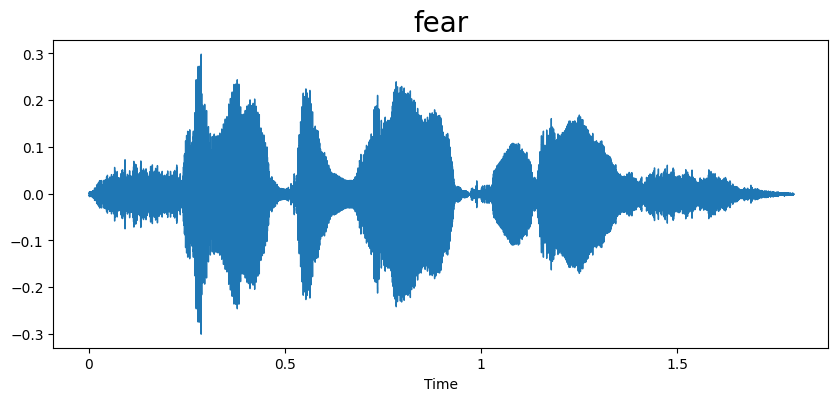

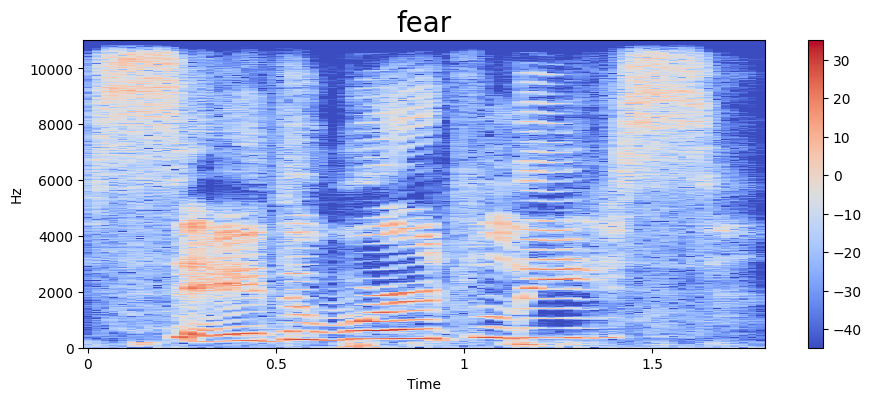

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

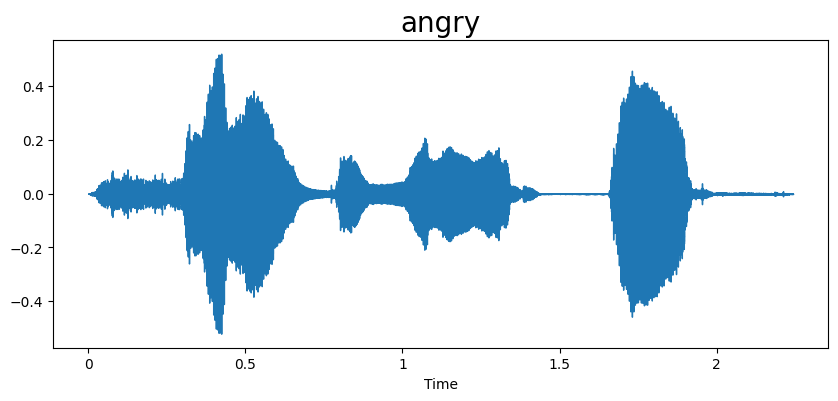

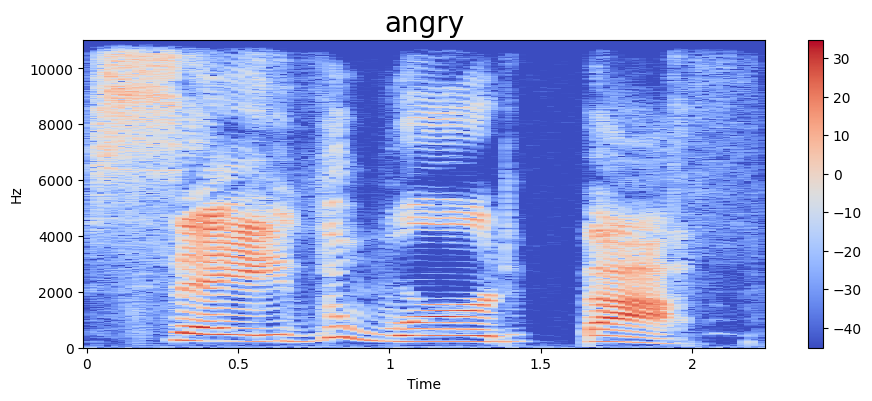

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

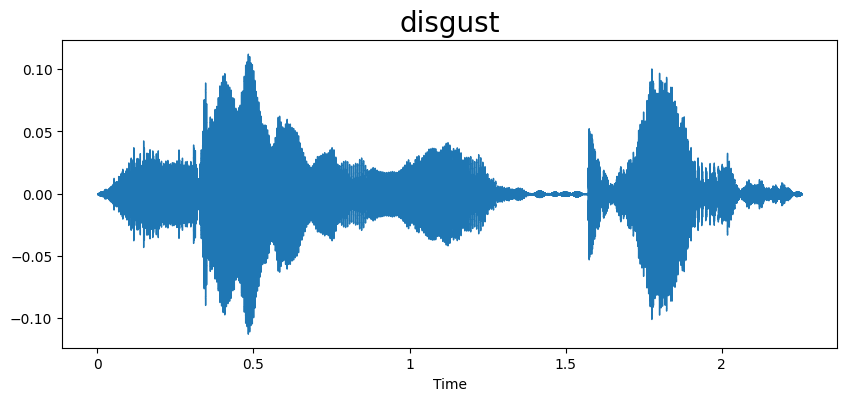

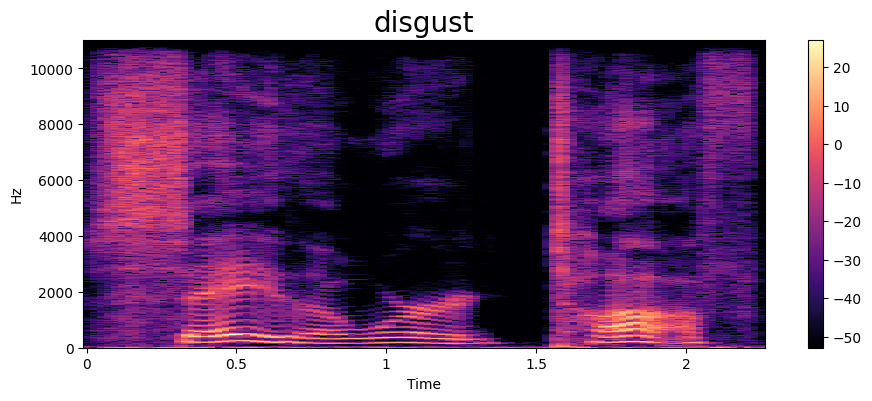

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

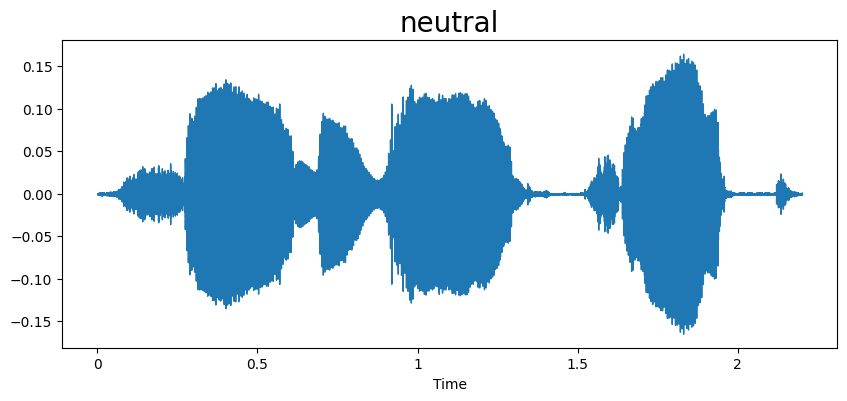

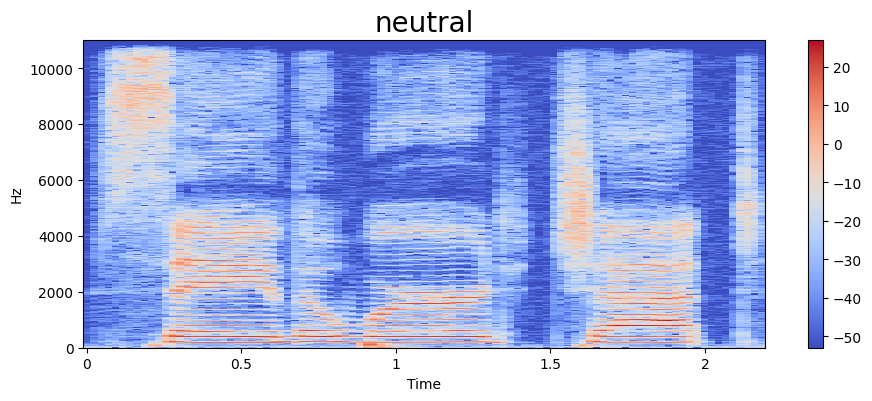

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

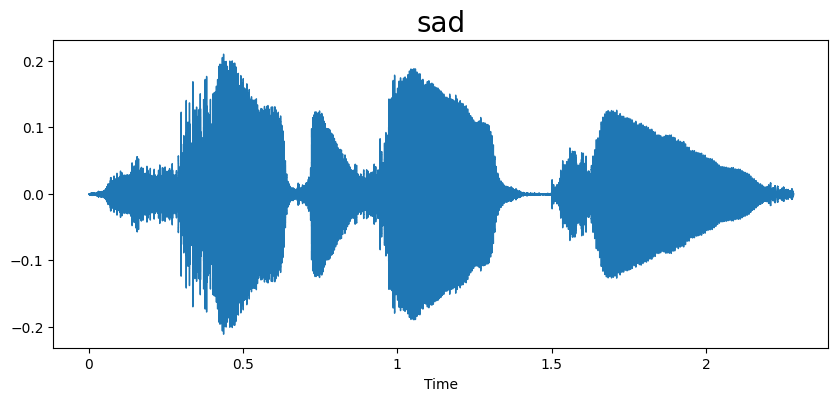

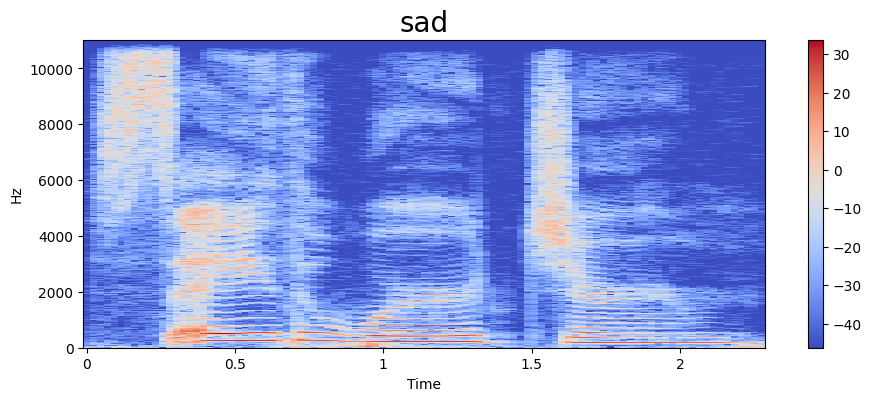

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

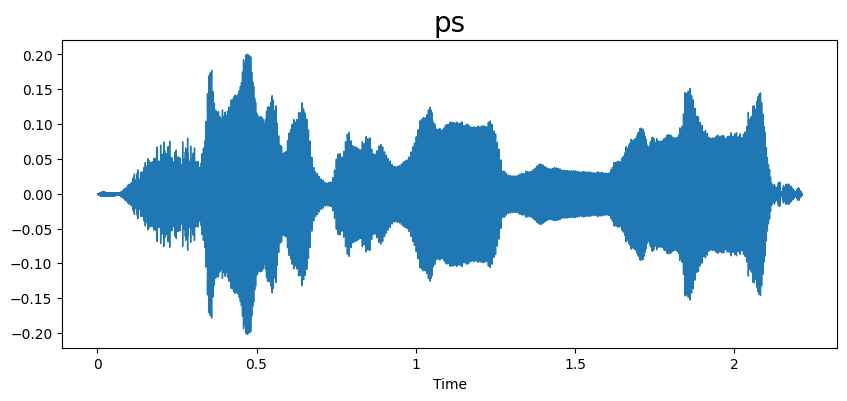

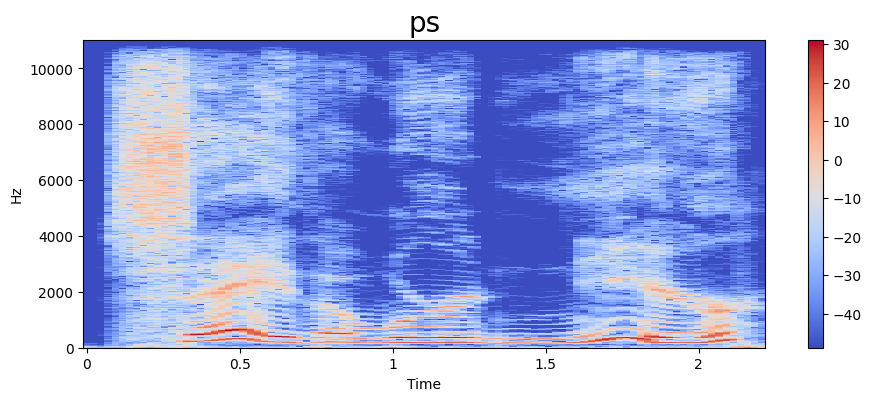

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

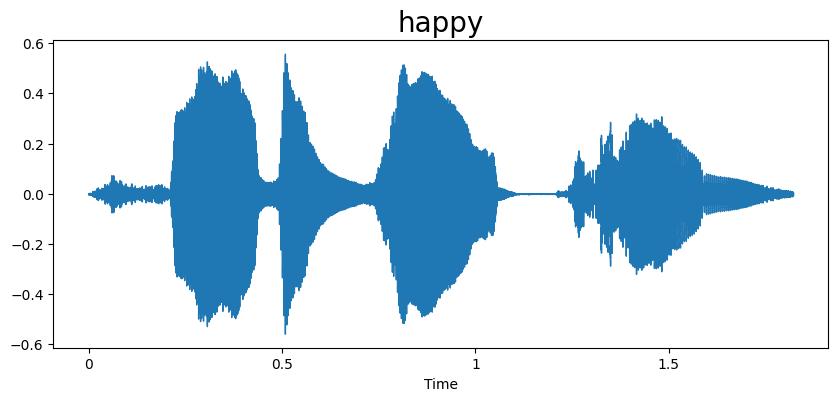

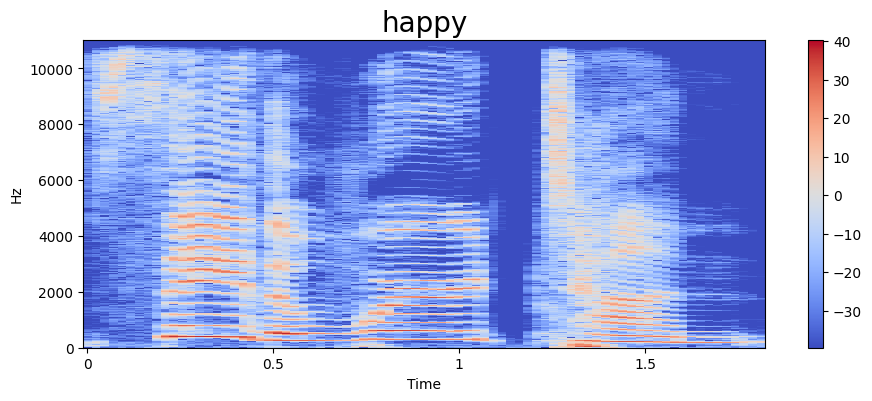

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.2319373e+02,  9.4541618e+01, -1.5288787e+00,  2.9158125e+01,
       -1.7932789e+00,  1.4312361e+00, -5.5601826e+00, -2.3183386e+01,
       -1.8207386e+00, -1.3730101e-01, -1.6071602e+01,  4.5820260e+00,
       -7.9763913e+00,  8.7771851e-01, -5.0384707e+00, -3.5852158e+00,
        2.4976981e+00, -6.5689316e+00, -5.3388209e+00,  3.2429290e+00,
       -4.2095585e+00, -1.8185970e+00, -1.3954209e+00,  1.9779382e+00,
       -2.4613631e+00,  2.9437799e+00, -2.2286170e+00,  1.7505776e+00,
        1.3866448e+00,  2.3858583e+00, -2.4536037e-01,  7.2494493e+00,
        1.6183231e+00,  4.7608442e+00,  3.6294112e+00,  1.5027496e+00,
        2.3208811e+00,  1.4628218e+00,  4.1272354e+00,  3.9567544e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-423.19373, 94.54162, -1.5288787, 29.158125, ...
1       [-403.79782, 102.593414, -24.428728, 12.36792,...
2       [-416.0424, 128.77516, -1.3177974, -4.9440002,...
3       [-430.54187, 75.90658, -0.1537924, 19.009048, ...
4       [-424.98175, 100.19008, -0.33041674, 36.05825,...
                              ...                        
2795    [-331.29092, 67.34092, -16.839418, 6.861033, -...
2796    [-389.91425, 44.456223, 5.673066, 42.423985, -...
2797    [-352.38358, 55.559113, 0.75185287, -4.854177,...
2798    [-327.0685, 39.073284, -15.167968, 17.228819, ...
2799    [-357.39178, 91.917496, -11.566877, -4.3486543...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=150, batch_size=64)

Epoch 1/150
35/35 [==============================] - 9s 29ms/step - loss: 1.0441 - accuracy: 0.6076 - val_loss: 2.3944 - val_accuracy: 0.1804
Epoch 2/150
35/35 [==============================] - 0s 10ms/step - loss: 0.3116 - accuracy: 0.8946 - val_loss: 2.2874 - val_accuracy: 0.4571
Epoch 3/150
35/35 [==============================] - 0s 10ms/step - loss: 0.1348 - accuracy: 0.9585 - val_loss: 2.6033 - val_accuracy: 0.4714
Epoch 4/150
35/35 [==============================] - 0s 10ms/step - loss: 0.1660 - accuracy: 0.9473 - val_loss: 3.2152 - val_accuracy: 0.3625
Epoch 5/150
35/35 [==============================] - 0s 11ms/step - loss: 0.0861 - accuracy: 0.9754 - val_loss: 3.2469 - val_accuracy: 0.4339
Epoch 6/150
35/35 [==============================] - 0s 11ms/step - loss: 0.0844 - accuracy: 0.9737 - val_loss: 3.1201 - val_accuracy: 0.4446
Epoch 7/150
35/35 [==============================] - 0s 14ms/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 3.3759 - val_accuracy: 0.4339
Epoch 

## Save the Model

In [ ]:
model.save("file.h5")

In [ ]:
import pickle

In [ ]:
filename = '/content/drive/MyDrive/ML_Projects/Saved Models/Speech_Emotion_Recongnition'
pickle.dump(model,open(filename,'wb'))

In [ ]:
SER_Model = pickle.load(open('/content/drive/MyDrive/ML_Projects/Saved Models/Speech_Emotion_Recongnition','rb'))

In [ ]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
from keras.models import load_model

model = load_model('file.h5')
scores = model.evaluate(X, y)

LSTM_accuracy = scores[1]*100

print('Test accuracy: ', scores[1]*100, '%')

88/88 [==============================] - 1s 4ms/step - loss: 1.6701 - accuracy: 0.8982
Test accuracy:  89.82142806053162 %


## Plot the results

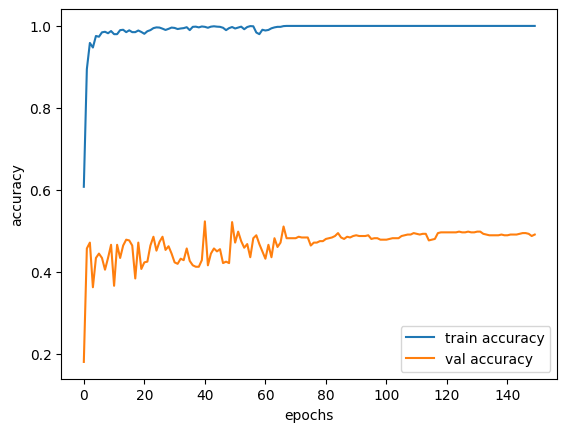

In [ ]:
epochs = list(range(150))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

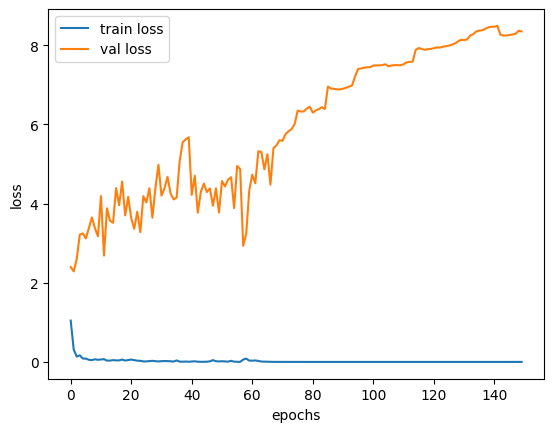

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
